# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [2]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [3]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [3]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [4]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [4]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [6]:
pregordr

0        1
1        2
2        1
3        2
4        3
5        1
6        2
7        3
8        1
9        2
10       1
11       1
12       2
13       3
14       1
15       2
16       3
17       1
18       2
19       1
20       2
21       1
22       2
23       1
24       2
25       3
26       1
27       1
28       2
29       3
        ..
13563    2
13564    3
13565    1
13566    1
13567    1
13568    2
13569    1
13570    2
13571    3
13572    4
13573    1
13574    2
13575    1
13576    1
13577    2
13578    1
13579    2
13580    1
13581    2
13582    3
13583    1
13584    2
13585    1
13586    2
13587    3
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [7]:
pregordr[0]

1

Select a slice from a column.

In [8]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [9]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [10]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [11]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [5]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [9]:
print(preg.birthord.value_counts())

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64


We can also use `isnull` to count the number of nans.

In [14]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [15]:
# Solution goes here

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [16]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [10]:
preg['totalwgt_kg'] = preg['totalwgt_lb']*0.4536
preg.totalwgt_kg.mean()

3.2956890683779663

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [11]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [19]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [20]:
# Solution goes here

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [21]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [22]:
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750


How old is the respondent with `caseid` 1?

In [13]:
preg[preg['caseid']==1]['agepreg'][1]

39.25

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [14]:
preg[preg.caseid == 2298]['prglngth']

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [22]:
preg[preg.caseid == 5012]['totalwgt_kg']

5515    2.7216
Name: totalwgt_kg, dtype: float64

In [30]:
preg.pregnum.value_counts().sort_index()

1     1267
2     2864
3     3330
4     2444
5     1525
6      900
7      560
8      320
9      189
10      90
11      33
12      24
14      28
19      19
Name: pregnum, dtype: int64

In [25]:
prglngth_4_alive_births = preg.prglngth[preg.outcome == 1]

In [52]:
live = preg[preg.outcome == 1]

In [73]:
firsts = live[(live.birthord == 1) & (27 <= live.prglngth) & (live.prglngth <= 50)]
others = live[(live.birthord != 1) & (27 <= live.prglngth) & (live.prglngth <= 50)]

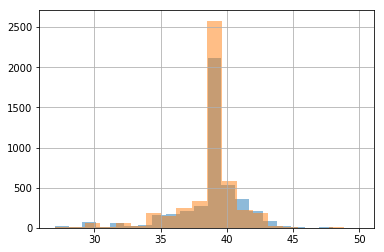

In [75]:
firsts.prglngth.hist(bins = 20, alpha = 0.5)
others.prglngth.hist(bins = 20, alpha = 0.5)

In [76]:
print(live.prglngth.mean())
print(live.prglngth.var())
print(live.prglngth.std())

38.56055968517709
7.302662067826851
2.702343810070593


In [80]:
print(firsts.prglngth.mean())
print(others.prglngth.mean())

(firsts.prglngth.mean() - others.prglngth.mean())*8*24

38.710340104998856
38.64786033638492


11.996115573875159